In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
pd.pandas.set_option('display.max_columns',None)

# 1. Data Pre-processing

## 1.1 Download the dataset for the period 2009 – 2018 and create a dataframe that concatenates Wales (total) employment value only.

In [2]:
import os
df=pd.DataFrame()
f1=pd.read_csv('yr_2009.csv')
directory = r'C:\Users\nsr156\Documents\PROJECTS\GIT_HUB\Welsh Employment Stats'
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        if filename=='yr_2009.csv':
            df=pd.read_csv(filename)
            continue
        else:
            f2=pd.read_csv(filename)
            df=pd.concat([df,f2.iloc[:,1]],axis=1)
    else:
        continue

In [3]:
df.head()

,Industries,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,yr_2016,yr_2017,yr_2018
0,"Agriculture, forestry and fishing",37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
1,Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700
2,Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800
3,"Wholesale, retail, transport, hotels and food",345400,344500,343100,347300,345100,337300,357700,360200,333500,347600
4,Information and communication,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500


## 1.3.	Change the name of the industries as below

In [4]:
df.rename(columns={'Industries':'Industry'},inplace=True)
df.index=['Agriculture','Production','Construction','Wholesale',
          'ICT','Finance','Real_Estate','Professional_Service','Public_Administration','Other_Service']
df.drop('Industry',axis=1,inplace=True)

In [5]:
df

,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,yr_2016,yr_2017,yr_2018
Agriculture,37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700
Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800
Wholesale,345400,344500,343100,347300,345100,337300,357700,360200,333500,347600
ICT,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500
Finance,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500
Real_Estate,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200
Professional_Service,144800,145800,143600,137300,149900,152900,166200,161200,176400,187100
Public_Administration,415600,418600,425600,421000,427000,427600,423200,418500,424500,434900
Other_Service,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800


## 1.2.	Check for any null value or outlier. If found replace that with mean value.  

In [6]:
pd.DataFrame({'MissingValues':df.isnull().sum().values},index=df.columns)

,MissingValues
yr_2009,0
yr_2010,0
yr_2011,0
yr_2012,0
yr_2013,0
yr_2014,0
yr_2015,0
yr_2016,0
yr_2017,0
yr_2018,0


plt.figure(figsize=(12,6))
sb.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.xticks(fontsize=14,fontweight='bold',rotation=75)
plt.title('Missing Values Visualisation-Heat Map',fontsize=16,fontweight='bold')
plt.show()

#### Above heat map shows that there are no missing values in any of the years

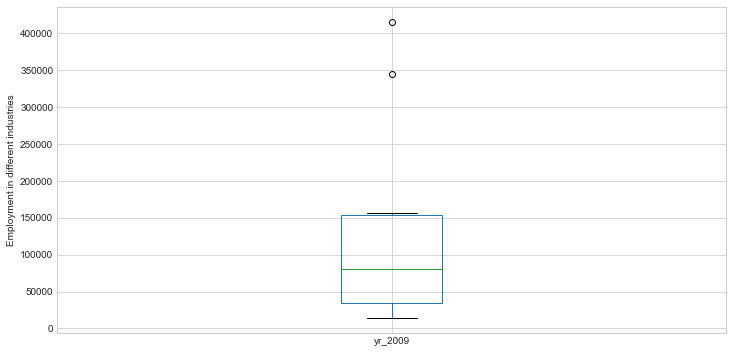

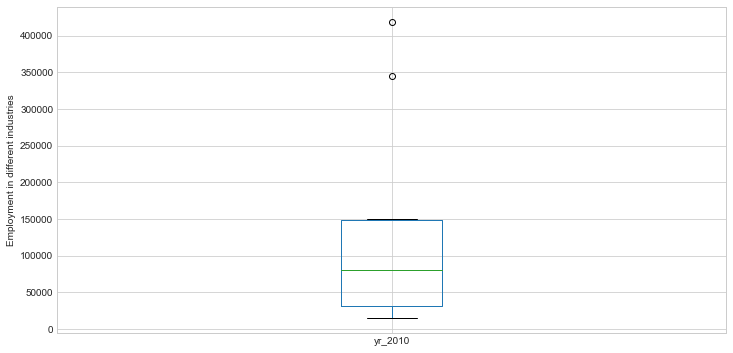

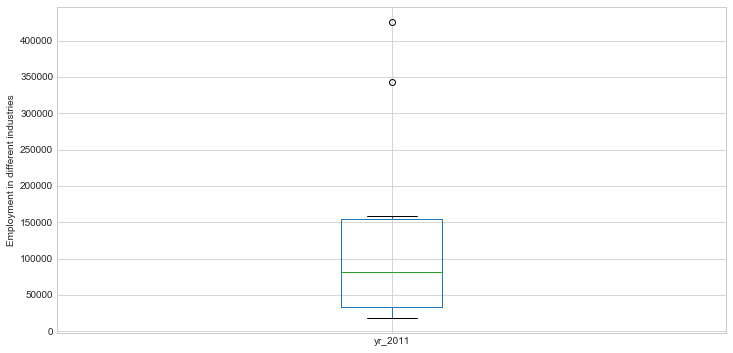

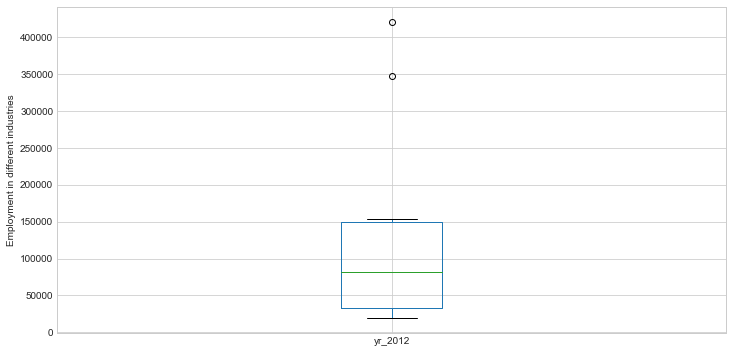

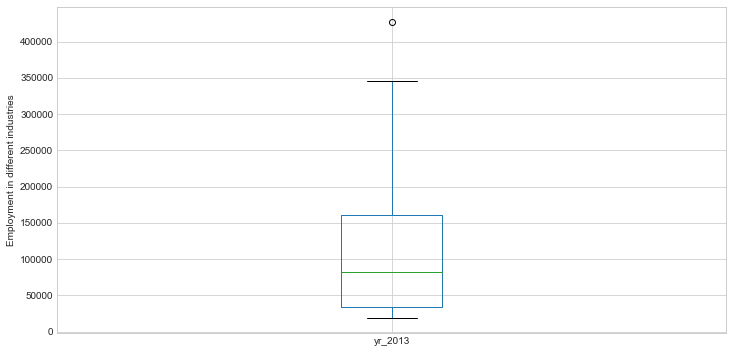

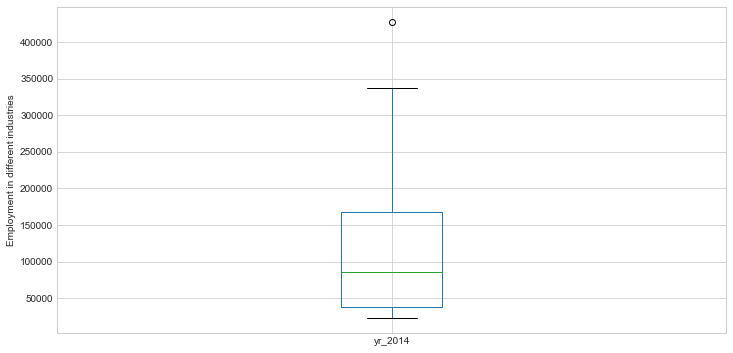

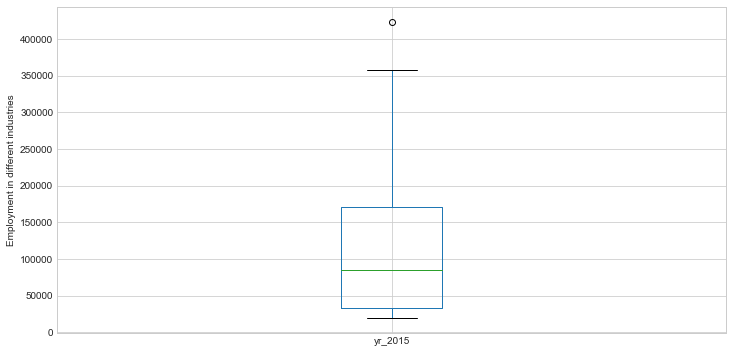

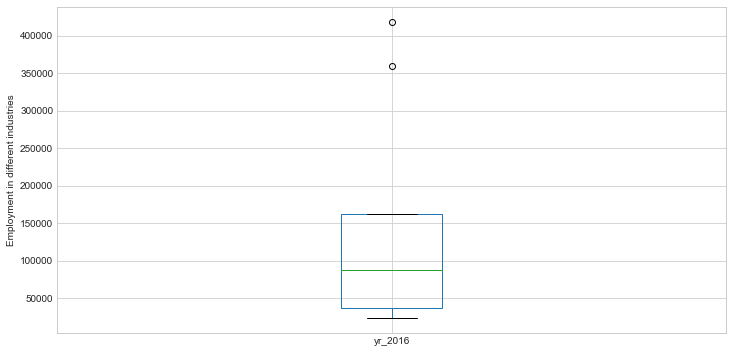

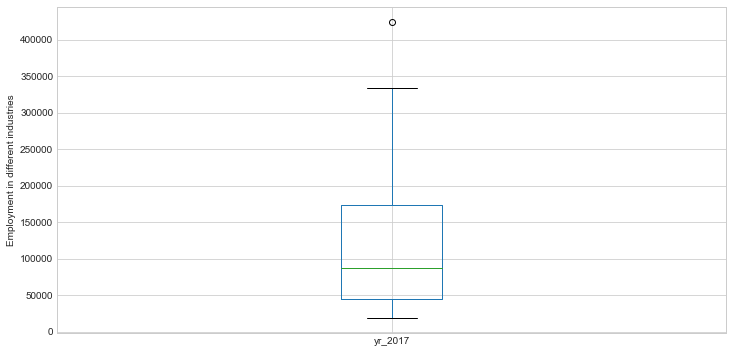

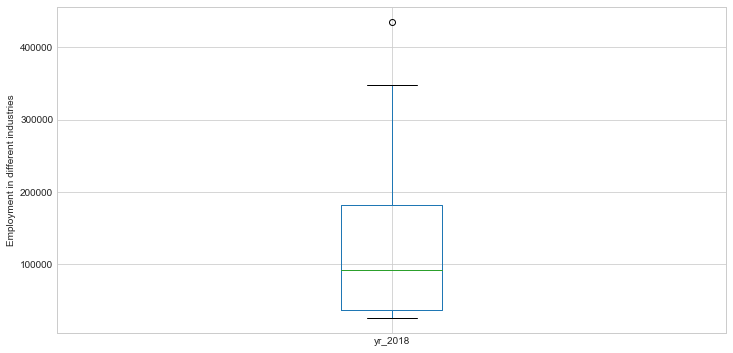

In [19]:
for fea in df.columns:
    plt.figure(figsize=(12,6))
    df[fea].plot(kind='box')
    plt.ylabel('Employment in different industries')
    plt.xlabel('')
    plt.show()

In [8]:
dfCopy=df.copy()
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
df[(df> (q3 + 1.5 * IQR)).any(axis=1)]

,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,yr_2016,yr_2017,yr_2018
Wholesale,345400,344500,343100,347300,345100,337300,357700,360200,333500,347600
Public_Administration,415600,418600,425600,421000,427000,427600,423200,418500,424500,434900


#### above observastions are outliers, replacing outliers by 'mean' of that particular feature
#### outliers are present in 'Wholesale' and 'Public_admisnistartion'

In [9]:
for fea in dfCopy.columns:
    q1=dfCopy[fea].quantile(0.25)
    q3=dfCopy[fea].quantile(0.75)
    IQR=q3-q1
    dfCopy[fea][df[fea]> (q3+ 1.5 * IQR)]=dfCopy[fea].mean()

In [10]:
dfCopy

,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,yr_2016,yr_2017,yr_2018
Agriculture,37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700
Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800
Wholesale,133610,133040,134660,133730,345100,337300,357700,140880,333500,347600
ICT,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500
Finance,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500
Real_Estate,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200
Professional_Service,144800,145800,143600,137300,149900,152900,166200,161200,176400,187100
Public_Administration,133610,133040,134660,133730,136510,139440,140380,140880,142290,145220
Other_Service,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800


In [11]:
dfCopy.loc[['Wholesale','Public_Administration'],:]

,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,yr_2016,yr_2017,yr_2018
Wholesale,133610,133040,134660,133730,345100,337300,357700,140880,333500,347600
Public_Administration,133610,133040,134660,133730,136510,139440,140380,140880,142290,145220


# 2. Data analysis

## 2.1.	Which industry employed highest and lowest workers over the period?

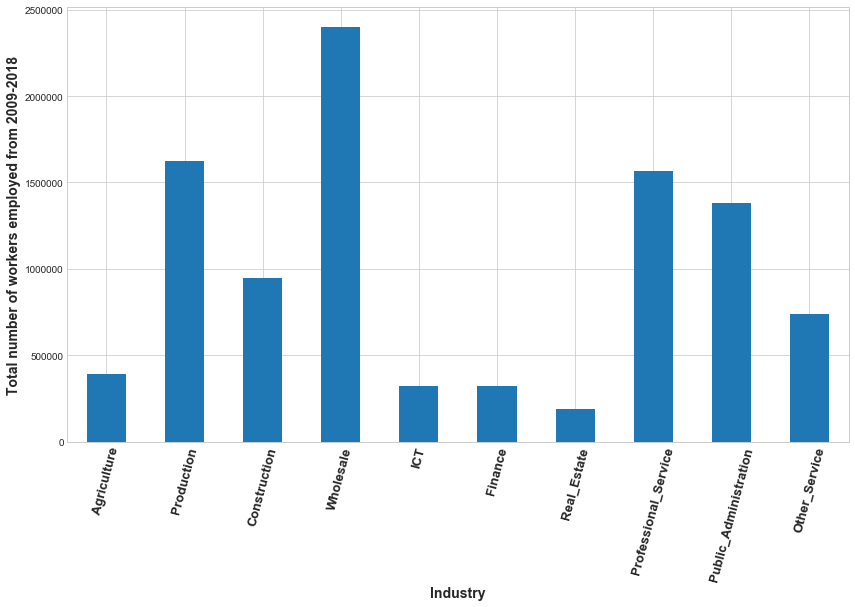

In [20]:
plt.figure(figsize=(14,8))
dfCopy.sum(axis=1).plot(kind='bar')
plt.ylabel('Total number of workers employed from 2009-2018',fontweight='bold',fontsize=14)
plt.xlabel('Industry',fontsize=14,fontweight='bold')
plt.xticks(fontsize=13,fontweight='bold',rotation=75)
plt.show()

#### Over the period of 2009-2018, the highest number of workers are employed by WHOLESALE industry
#### Over the period of 2009-2018, the lowest number of workers are employed by REAL ESTATE industry

## 2.2.	Which industry has the highest and lowest overall growth over the period? 

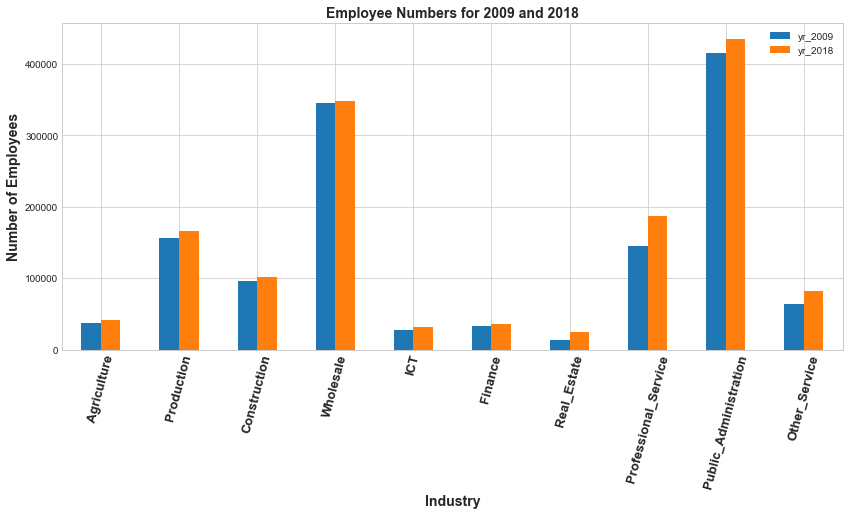

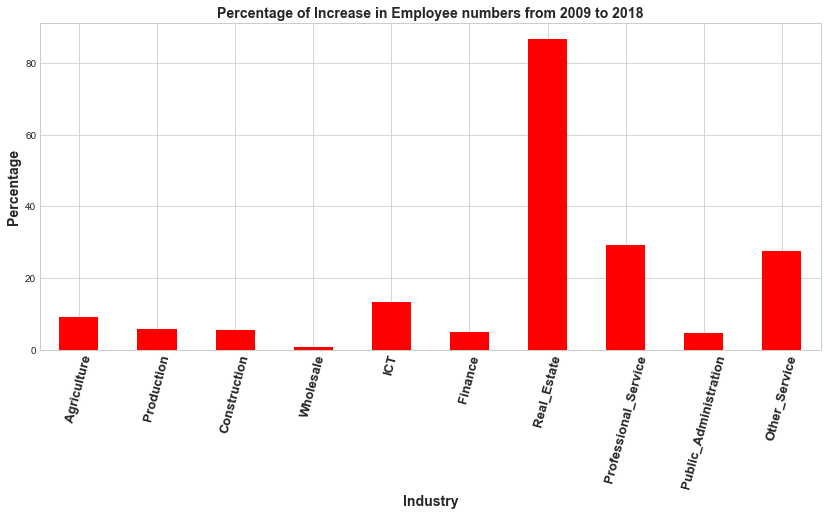

In [21]:
df[['yr_2009','yr_2018']].plot(kind='bar',figsize=(14,6))
plt.xlabel('Industry',fontsize=14,fontweight='bold')
plt.ylabel('Number of Employees',fontsize=14,fontweight='bold')
plt.title('Employee Numbers for 2009 and 2018',fontsize=14,fontweight='bold')
plt.xticks(fontsize=13,fontweight='bold',rotation=75)
plt.show()


((df['yr_2018']-df['yr_2009'])/df['yr_2009']*100).plot(kind='bar',figsize=(14,6),color='r')
plt.xlabel('Industry',fontsize=14,fontweight='bold')
plt.ylabel('Percentage',fontsize=14,fontweight='bold')
plt.title('Percentage of Increase in Employee numbers from 2009 to 2018',fontsize=14,fontweight='bold')
plt.xticks(fontsize=13,fontweight='bold',rotation=75)
plt.show()


#### The above two graphs shows that, REAL ESTATE industry has increased it's employee numbers by highest percenatge

## 2.3.	Which years are the best and worst performing year in relation to number of employment. (highest and lowest employment) 

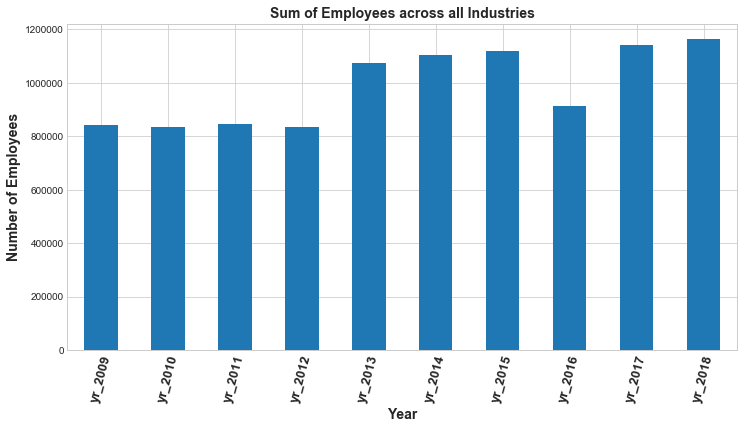

In [22]:
dfCopy.sum().plot(kind='bar',figsize=(12,6))
plt.xlabel('Year',fontsize=14,fontweight='bold')
plt.ylabel('Number of Employees',fontsize=14,fontweight='bold')
plt.title('Sum of Employees across all Industries',fontsize=14,fontweight='bold')
plt.xticks(fontsize=13,fontweight='bold',rotation=75)
plt.show()

#### From the above figure, Year 2009 has least number of employees and Year 2018 has Highest number of employees employeed across all the industries

In [15]:
dfCopy.loc['Agriculture',:].sum()

392800

In [16]:
dfCopy

,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,yr_2016,yr_2017,yr_2018
Agriculture,37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700
Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800
Wholesale,133610,133040,134660,133730,345100,337300,357700,140880,333500,347600
ICT,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500
Finance,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500
Real_Estate,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200
Professional_Service,144800,145800,143600,137300,149900,152900,166200,161200,176400,187100
Public_Administration,133610,133040,134660,133730,136510,139440,140380,140880,142290,145220
Other_Service,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800


# 4.	Correlation

## 4.1. Taking average employment number for each industry over the period, show and identify the highest and lowest correlated industries.

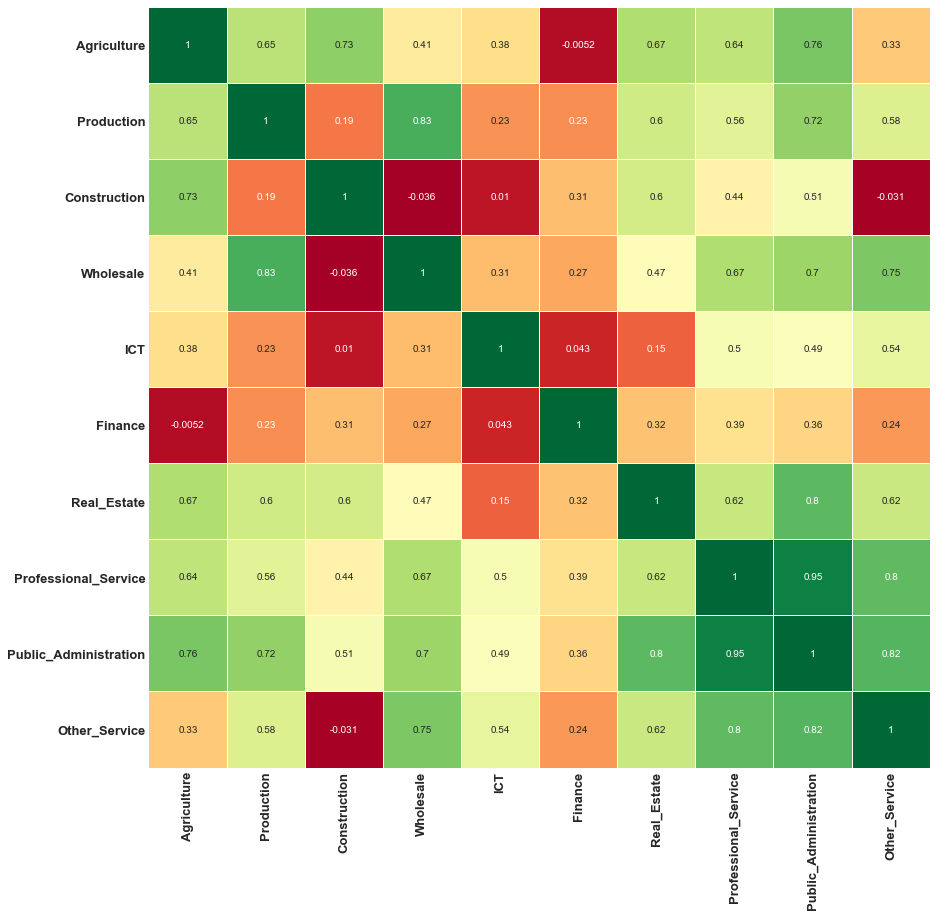

In [29]:
plt.figure(figsize=(14,14))
sb.heatmap(dfCopy.T.corr(),annot=True,cbar=False,cmap='RdYlGn',linecolor='w',linewidths=0.05)
plt.ylim([10,0])
plt.xticks(fontsize=13,fontweight='bold')
plt.yticks(fontsize=13,fontweight='bold')
plt.show()

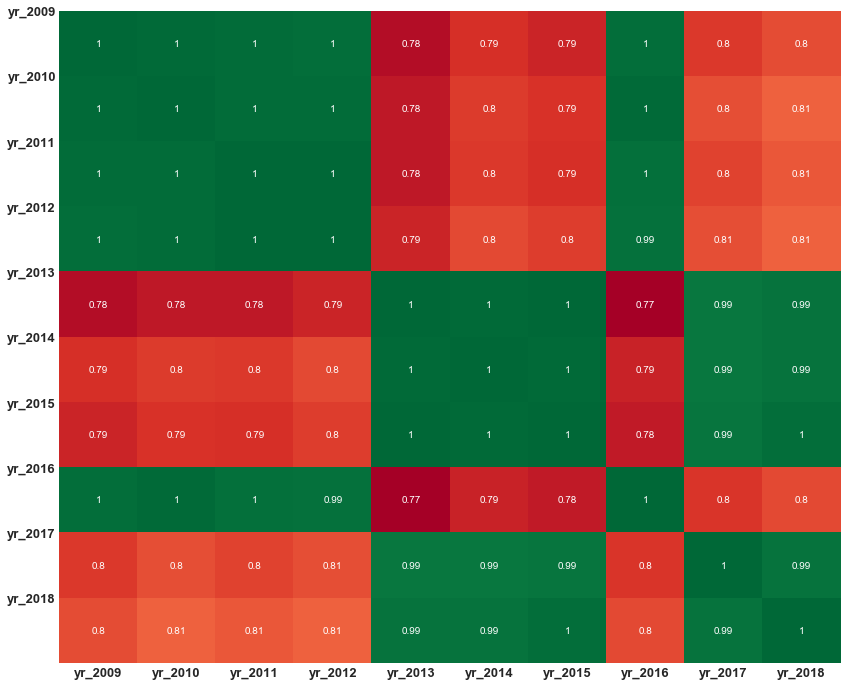

In [40]:
plt.figure(figsize=(14,12))
sb.heatmap(dfCopy.corr(),annot=True,cbar=False,cmap='RdYlGn',linecolor='w')
# plt.ylim([10,0])
plt.xticks(fontsize=13,fontweight='bold')
plt.yticks(np.arange(11),fontsize=13,fontweight='bold',rotation=0)
plt.show()

# 5.	Clustering (k means & hierarchical)

## 5.1.	Using the best and worst performing year column’s employment data (2.3) undertake a K means clustering analysis (K=2 & 3) and identify industries cluster together.  Write your own interpretation (~100 words).

In [41]:
from sklearn.cluster import KMeans
from sklearn.cluster import hierarchical

In [118]:
dfClus=df[['yr_2009','yr_2018']]
dfClus

,yr_2009,yr_2018
Agriculture,37700,41100
Production,156700,165700
Construction,96600,101800
Wholesale,345400,347600
ICT,27800,31500
Finance,33800,35500
Real_Estate,13500,25200
Professional_Service,144800,187100
Public_Administration,415600,434900
Other_Service,64200,81800


In [119]:
km = KMeans(n_clusters=3, init='random',
            n_init=10, max_iter=300, 
            tol=1e-04, random_state=0)

y_km3 = km.fit_predict(dfClus)
dfClus['km_3']=y_km

km = KMeans(n_clusters=2, init='random',
            n_init=10, max_iter=300, 
            tol=1e-04, random_state=0)

y_km2 = km.fit_predict(dfClus)
dfClus['km_2']=y_km2
dfClus

,yr_2009,yr_2018,km_3,km_2
Agriculture,37700,41100,0,0
Production,156700,165700,2,0
Construction,96600,101800,2,0
Wholesale,345400,347600,1,1
ICT,27800,31500,0,0
Finance,33800,35500,0,0
Real_Estate,13500,25200,0,0
Professional_Service,144800,187100,2,0
Public_Administration,415600,434900,1,1
Other_Service,64200,81800,0,0


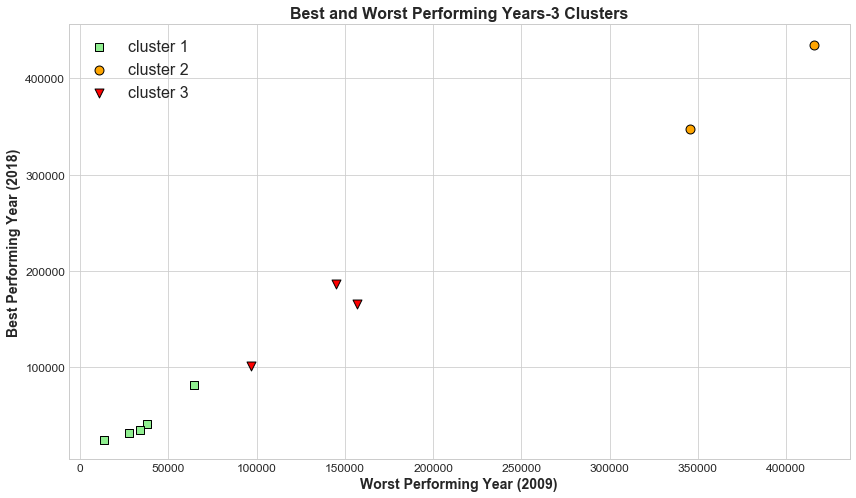

In [120]:
plt.figure(figsize=(14,8))
plt.scatter(
    dfClus.iloc[y_km3 == 0, 0], dfClus.iloc[y_km3 == 0, 1],
    s=80, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    dfClus.iloc[y_km3 == 1, 0], dfClus.iloc[y_km3 == 1, 1],
    s=80, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    dfClus.iloc[y_km3 == 2, 0], dfClus.iloc[y_km3 == 2, 1],
    s=80, c='red',
    marker='v', edgecolor='black',
    label='cluster 3'
)
plt.legend(scatterpoints=1,fontsize=16)
plt.title('Best and Worst Performing Years-3 Clusters',fontsize=16,fontweight='bold')
plt.xlabel('Worst Performing Year (2009)',fontsize=14,fontweight='bold')
plt.ylabel('Best Performing Year (2018)',fontsize=14,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

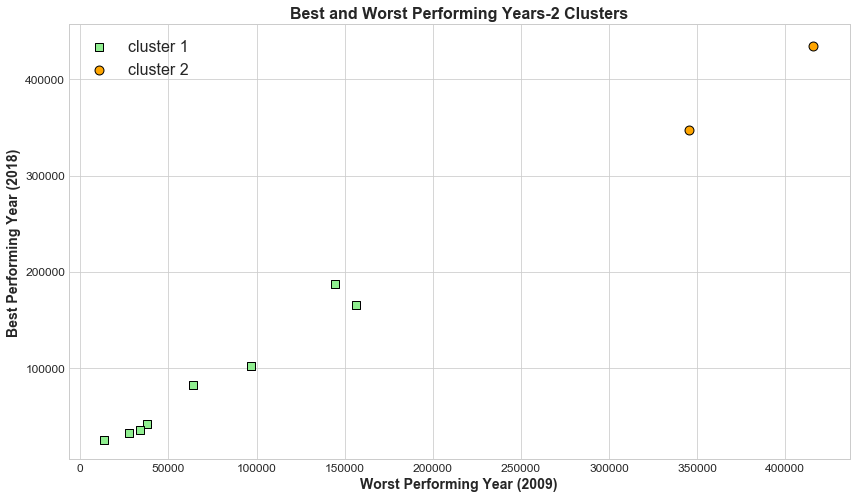

In [121]:
plt.figure(figsize=(14,8))
plt.scatter(
    dfClus.iloc[y_km2 == 0, 0], dfClus.iloc[y_km2 == 0, 1],
    s=80, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    dfClus.iloc[y_km2 == 1, 0], dfClus.iloc[y_km2 == 1, 1],
    s=80, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)


plt.legend(scatterpoints=1,fontsize=16)
plt.title('Best and Worst Performing Years-2 Clusters',fontsize=16,fontweight='bold')
plt.xlabel('Worst Performing Year (2009)',fontsize=14,fontweight='bold')
plt.ylabel('Best Performing Year (2018)',fontsize=14,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
write 100 words about the above two figures

## 5.2.	Using the same dataset (best & worst performing) create a hierarchical cluster.  Compare the cluster with k means clusters. 

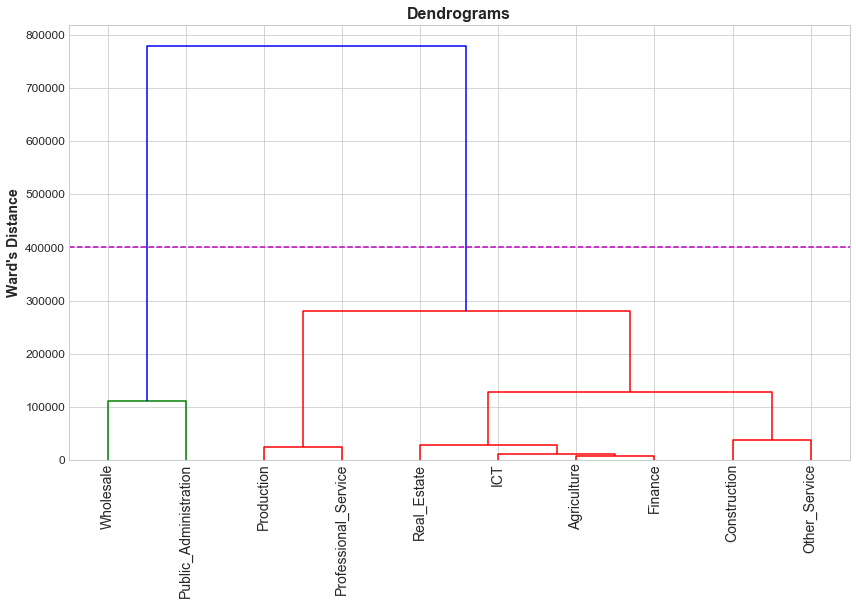

In [122]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(14, 8))   
dend = shc.dendrogram(shc.linkage(dfClus.drop(['km_2','km_3'],axis=1), method='ward'),
                      labels=dfClus.index,leaf_rotation=90, leaf_font_size=14,)

plt.ylabel("Ward's Distance",fontsize=14,fontweight='bold')
plt.yticks(fontsize=12)
plt.title("Dendrograms",fontsize=16,fontweight='bold') 
############ We can cut the dendrogram at blue line as it gives two clusters  ##############
plt.axhline(y=400000, color='m', linestyle='--')
plt.show()

In [123]:
dfClus

,yr_2009,yr_2018,km_3,km_2
Agriculture,37700,41100,0,0
Production,156700,165700,2,0
Construction,96600,101800,2,0
Wholesale,345400,347600,1,1
ICT,27800,31500,0,0
Finance,33800,35500,0,0
Real_Estate,13500,25200,0,0
Professional_Service,144800,187100,2,0
Public_Administration,415600,434900,1,1
Other_Service,64200,81800,0,0


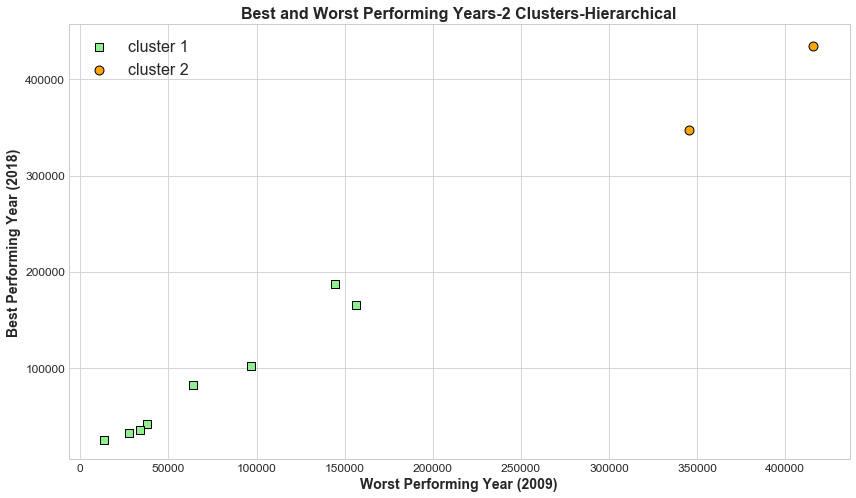

In [128]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_hi=cluster.fit_predict(dfClus.drop(['km_2','km_3'],axis=1))
dfClus['hiear2']=y_hi

plt.figure(figsize=(14,8))
plt.scatter(
    dfClus.iloc[y_hi == 0, 0], dfClus.iloc[y_hi == 0, 1],
    s=80, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    dfClus.iloc[y_hi == 1, 0], dfClus.iloc[y_hi == 1, 1],
    s=80, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.legend(scatterpoints=1,fontsize=16)
plt.title('Best and Worst Performing Years-2 Clusters-Hierarchical',fontsize=16,fontweight='bold')
plt.xlabel('Worst Performing Year (2009)',fontsize=14,fontweight='bold')
plt.ylabel('Best Performing Year (2018)',fontsize=14,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [131]:
dfClus

,yr_2009,yr_2018,km_3,km_2,hiear2
Agriculture,37700,41100,0,0,0
Production,156700,165700,2,0,0
Construction,96600,101800,2,0,0
Wholesale,345400,347600,1,1,1
ICT,27800,31500,0,0,0
Finance,33800,35500,0,0,0
Real_Estate,13500,25200,0,0,0
Professional_Service,144800,187100,2,0,0
Public_Administration,415600,434900,1,1,1
Other_Service,64200,81800,0,0,0


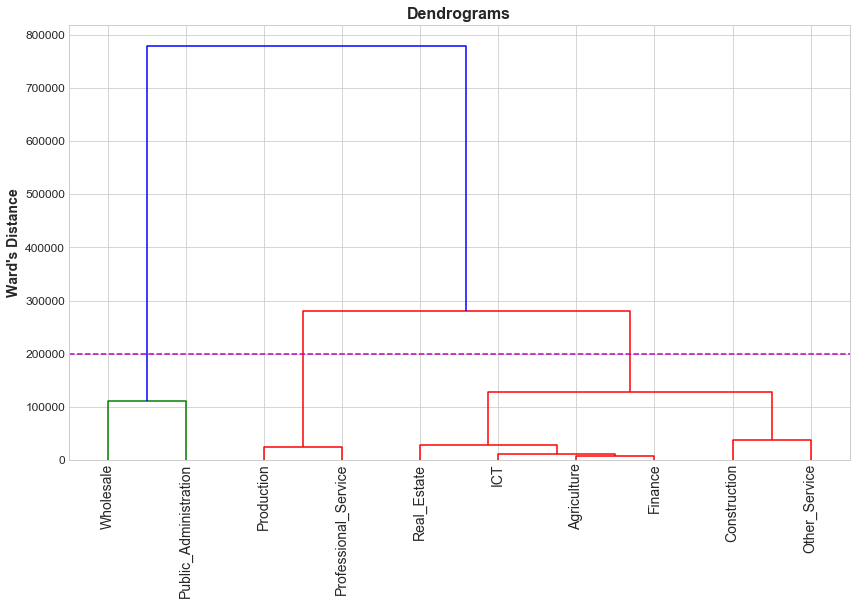

In [126]:
plt.figure(figsize=(14, 8))   
dend = shc.dendrogram(shc.linkage(dfClus.drop(['km_2','km_3','hiear'],axis=1), method='ward'),
                      labels=dfClus.index,leaf_rotation=90, leaf_font_size=14,)

plt.ylabel("Ward's Distance",fontsize=14,fontweight='bold')
plt.yticks(fontsize=12)
plt.title("Dendrograms",fontsize=16,fontweight='bold') 
############ We can cut the dendrogram at blue line as it gives two clusters  ##############
plt.axhline(y=200000, color='m', linestyle='--')
plt.show()

In [134]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_hi=cluster.fit_predict(dfClus.drop(['km_2','km_3','hiear2'],axis=1))
dfClus['hiear3']=y_hi

dfClus

,yr_2009,yr_2018,km_3,km_2,hiear2,hiear3
Agriculture,37700,41100,0,0,0,0
Production,156700,165700,2,0,0,2
Construction,96600,101800,2,0,0,0
Wholesale,345400,347600,1,1,1,1
ICT,27800,31500,0,0,0,0
Finance,33800,35500,0,0,0,0
Real_Estate,13500,25200,0,0,0,0
Professional_Service,144800,187100,2,0,0,2
Public_Administration,415600,434900,1,1,1,1
Other_Service,64200,81800,0,0,0,0


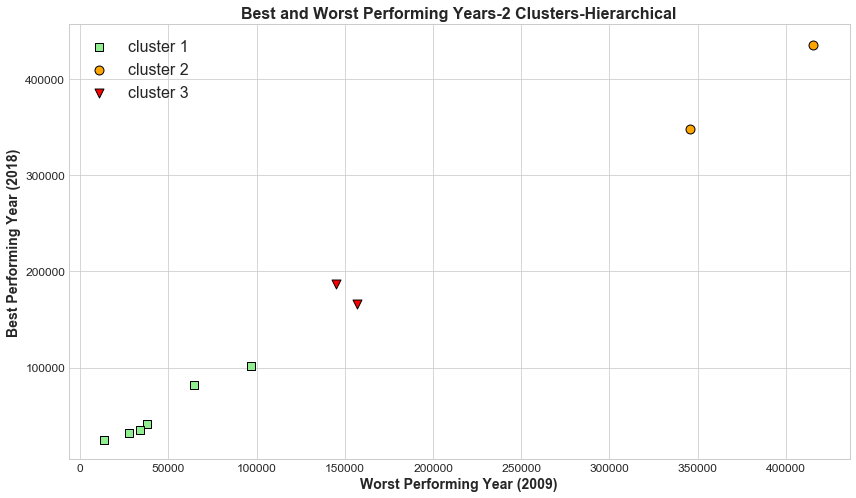

In [135]:


plt.figure(figsize=(14,8))
plt.scatter(
    dfClus.iloc[y_hi == 0, 0], dfClus.iloc[y_hi == 0, 1],
    s=80, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    dfClus.iloc[y_hi == 1, 0], dfClus.iloc[y_hi == 1, 1],
    s=80, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    dfClus.iloc[y_hi == 2, 0], dfClus.iloc[y_hi == 2, 1],
    s=80, c='red',
    marker='v', edgecolor='black',
    label='cluster 3'
)
plt.legend(scatterpoints=1,fontsize=16)
plt.title('Best and Worst Performing Years-2 Clusters-Hierarchical',fontsize=16,fontweight='bold')
plt.xlabel('Worst Performing Year (2009)',fontsize=14,fontweight='bold')
plt.ylabel('Best Performing Year (2018)',fontsize=14,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()